In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/FINAL YEAR PROJECT/fer2013.csv')
data.shape

(35887, 3)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  35887 non-null  int64 
 1   pixels   35887 non-null  object
 2   Usage    35887 non-null  object
dtypes: int64(1), object(2)
memory usage: 841.2+ KB


In [ ]:
data.describe()

,emotion
count,35887.000000
mean,3.323265
std,1.873819
min,0.000000
25%,2.000000
50%,3.000000
75%,5.000000
max,6.000000


In [ ]:
data.emotion.max

<bound method NDFrame._add_numeric_operations.<locals>.max of 0        0
1        0
2        2
3        4
4        6
        ..
35882    6
35883    3
35884    0
35885    3
35886    2
Name: emotion, Length: 35887, dtype: int64>

In [ ]:
data.head(10)

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
5,2,55 55 55 55 55 54 60 68 54 85 151 163 170 179 ...,Training
6,4,20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...,Training
7,3,77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...,Training
8,3,85 84 90 121 101 102 133 153 153 169 177 189 1...,Training
9,2,255 254 255 254 254 179 122 107 95 124 149 150...,Training


In [ ]:
data.Usage.value_counts()

Training       28709
PublicTest      3589
PrivateTest     3589
Name: Usage, dtype: int64

In [ ]:
emotion_map = {0: 'Angry', 1: 'Digust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'}
emotion_counts = data['emotion'].value_counts(sort=False).reset_index()
emotion_counts.columns = ['emotion', 'number']
emotion_counts['emotion'] = emotion_counts['emotion'].map(emotion_map)
emotion_counts

,emotion,number
0,Angry,4953
1,Fear,5121
2,Sad,6077
3,Neutral,6198
4,Happy,8989
5,Surprise,4002
6,Digust,547


In [ ]:
emotion_map = {0: 'Angry', 1: 'Digust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'}

In [ ]:
data['emotion'].value_counts(sort=False).reset_index()

,index,emotion
0,0,4953
1,2,5121
2,4,6077
3,6,6198
4,3,8989
5,5,4002
6,1,547


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


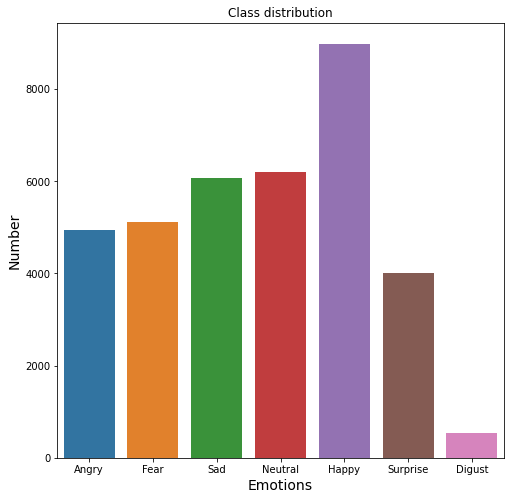

In [ ]:
plt.figure(figsize=(8,8))
sns.barplot(emotion_counts.emotion, emotion_counts.number)
plt.title('Class distribution')
plt.ylabel('Number', fontsize=14)
plt.xlabel('Emotions', fontsize=14)
plt.show()

In [ ]:
pixels = data.pixels.iloc[0].split()
len(pixels)

2304

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  


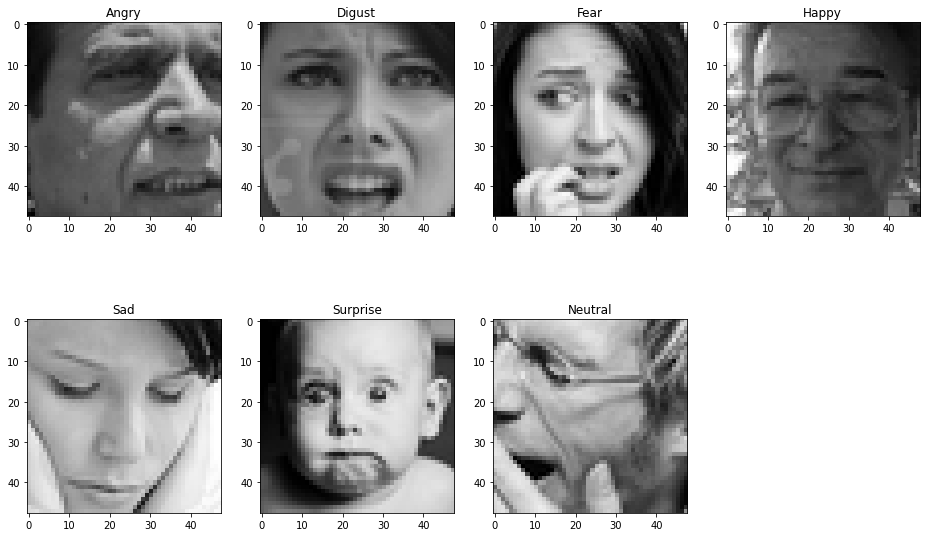

In [ ]:
def convert_to_image(row):
    pixels, emotion = row['pixels'], emotion_map[row['emotion']]
    img = np.array(pixels.split())
    img = img.reshape(48,48)

    return np.array([img.astype(np.uint8), emotion])

plt.figure(0, figsize=(16,10))
for i in range(1,8):
    face = data[data['emotion'] == i-1].iloc[4]
    img = convert_to_image(face)
    plt.subplot(2,4,i)
    plt.imshow(img[0], cmap='gray', vmin=0, vmax=255)
    plt.title(img[1])

plt.show()

In [ ]:
type(data_train)

pandas.core.frame.DataFrame

In [ ]:
emotion_map = {0: 'Angry', 1: 'Digust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'}
for i in Y.index:
    print(emotion_map[i])

Angry
Fear
Sad
Neutral
Happy
Surprise
Digust


In [ ]:
z = data_test['emotion'].value_counts(sort=False)
for i in z.index:
    print(emotion_map[i])

Angry
Surprise
Neutral
Sad
Fear
Happy
Digust


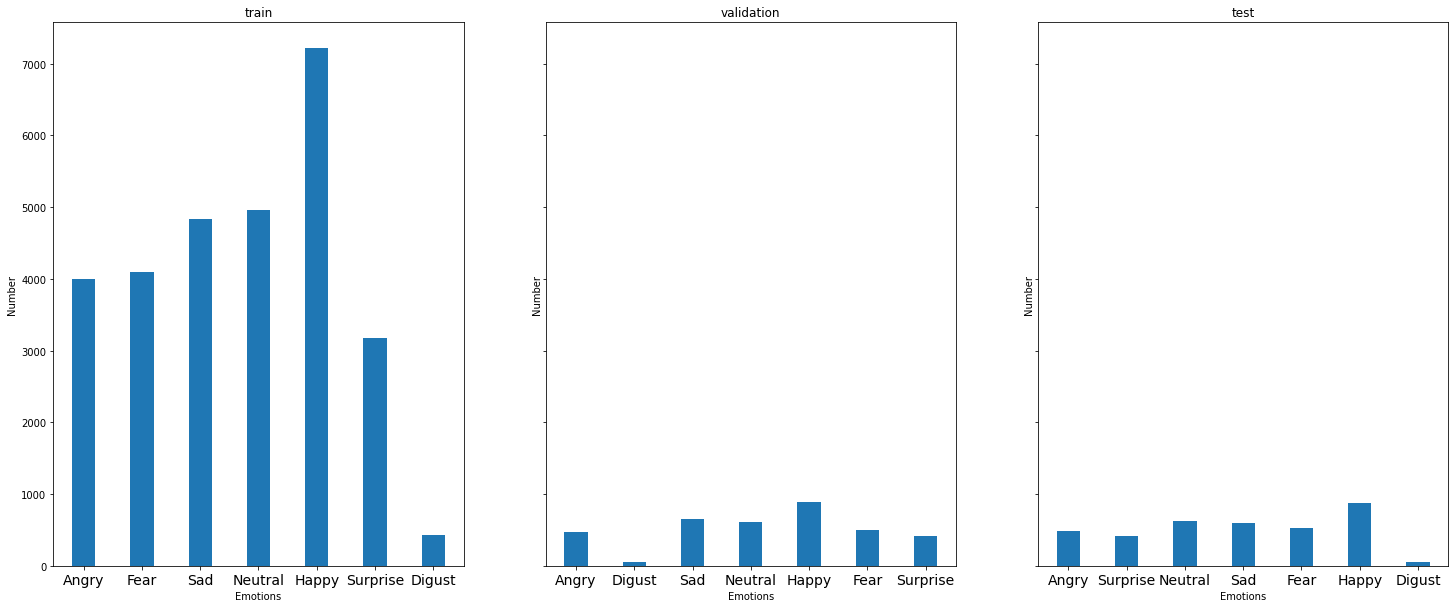

In [ ]:
emotion_map = {0: 'Angry', 1: 'Digust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'}
def setup_axe(axe,df,title):
    y = df['emotion'].value_counts(sort=False)
    pos = [i for i in range(10,71,10)]
    axe.bar(pos, y, width=4)
    axe.set_xticks(pos)
    axe.set_xticklabels([emotion_map[i] for i in y.index], fontsize=14)
    axe.set_xlabel("Emotions")
    axe.set_ylabel("Number")
    axe.set_title(title)
   
fig, ax = plt.subplots(1,3, figsize=(25, 10), sharey=True) 
setup_axe(ax[0],data_train,'train')
setup_axe(ax[1],data_val,'validation')
setup_axe(ax[2],data_test,'test')
plt.show()

In [ ]:
data_train['pixels']

0        70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1        151 150 147 155 148 133 111 140 170 174 182 15...
2        231 212 156 164 174 138 161 173 182 200 106 38...
3        24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4        4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...
                               ...                        
28704    84 85 85 85 85 85 85 85 86 86 86 87 86 86 91 9...
28705    114 112 113 113 111 111 112 113 115 113 114 11...
28706    74 81 87 89 95 100 98 93 105 120 127 133 146 1...
28707    222 227 203 90 86 90 84 77 94 87 99 119 134 14...
28708    195 199 205 206 205 203 206 209 208 210 212 21...
Name: pixels, Length: 28709, dtype: object

In [ ]:
for i in range(28708):
    print(data_train['pixels'][i].split())
    break

['70', '80', '82', '72', '58', '58', '60', '63', '54', '58', '60', '48', '89', '115', '121', '119', '115', '110', '98', '91', '84', '84', '90', '99', '110', '126', '143', '153', '158', '171', '169', '172', '169', '165', '129', '110', '113', '107', '95', '79', '66', '62', '56', '57', '61', '52', '43', '41', '65', '61', '58', '57', '56', '69', '75', '70', '65', '56', '54', '105', '146', '154', '151', '151', '155', '155', '150', '147', '147', '148', '152', '158', '164', '172', '177', '182', '186', '189', '188', '190', '188', '180', '167', '116', '95', '103', '97', '77', '72', '62', '55', '58', '54', '56', '52', '44', '50', '43', '54', '64', '63', '71', '68', '64', '52', '66', '119', '156', '161', '164', '163', '164', '167', '168', '170', '174', '175', '176', '178', '179', '183', '187', '190', '195', '197', '198', '197', '198', '195', '191', '190', '145', '86', '100', '90', '65', '57', '60', '54', '51', '41', '49', '56', '47', '38', '44', '63', '55', '46', '52', '54', '55', '83', '138', '1

In [ ]:
data_train['emotion']

0        0
1        0
2        2
3        4
4        6
        ..
28704    2
28705    0
28706    4
28707    0
28708    4
Name: emotion, Length: 28709, dtype: int64

In [ ]:
#split data into training, validation and test set
data_train = data[data['Usage']=='Training'].copy()
options = ['PublicTest', 'PrivateTest']
data_test  = data[data['Usage'].isin(options)].copy()
print(f"train shape: {data_train.shape},\
        \ntest shape: {data_test.shape}")

train shape: (28709, 3),        
test shape: (7178, 3)


In [ ]:
data_train

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
...,...,...,...
28704,2,84 85 85 85 85 85 85 85 86 86 86 87 86 86 91 9...,Training
28705,0,114 112 113 113 111 111 112 113 115 113 114 11...,Training
28706,4,74 81 87 89 95 100 98 93 105 120 127 133 146 1...,Training
28707,0,222 227 203 90 86 90 84 77 94 87 99 119 134 14...,Training


In [ ]:
train_y = pd.DataFrame([emotion_map[i] for i in data_train['emotion']], columns=['labels'])
train_y

,labels
0,Angry
1,Angry
2,Fear
3,Sad
4,Neutral
...,...
28704,Fear
28705,Angry
28706,Sad
28707,Angry


In [ ]:
np.array(list(map(int, data_train['pixels'][0].split())))

array([ 70,  80,  82, ..., 106, 109,  82])